<a href="https://colab.research.google.com/github/JonasFerReis/Neural-Networks/blob/main/RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neurais

**Aluno:** Jonas Fernandes dos Reis  
**Matrícula:** 202020470

## Questões

### 1. Escreva uma função para simular a rede neural:
```
def feed_forward(x):
    a5 = x

    a4 = weights["w45"] * a5 + bias[3]
    a4 = sigmoid(a4)

    a3 = weights["w35"] * a5 + bias[2]
    a3 = sigmoid(a3)

    a2 = weights["w23"] * a3 + weights["w24"] * a4 + bias[1]
    a2 = relu(a2)

    a1 = weights["w12"] * a2 + weights["w13"] * a3 + weights["w14"] * a4 + bias[0]
    a1 = sigmoid(a1)

    return [a1, a2, a3, a4]
```
### 2. Escreva a função que, dada uma amostra de treinamento e os pesos da rede calcula delta para cada neuronio.
```
def calculate_error(output, expected):
    a1_error = expected - output
    a2_error = weights["w12"] * a1_error
    a3_error = weights["w13"] * a1_error + weights["w23"] * a2_error
    a4_error = weights["w14"] * a1_error + weights["w24"] * a2_error

    return [a1_error, a2_error, a3_error, a4_error]
```
### 3. Considerando a matriz de pesos:
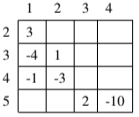
### Use as funções dos itens 1 e 2 para calcular a saída de cada neurônio e o erro, para as seguintes amostras de treinamento: x = 0.0, y = 0.5 e x = 1.0, y = 0.1

* x = 0.0, y = 0.5

Saída de cada neurônio:  
a1 = 0.9641740728650852  
a2 = 0.9585955456528549  
a3 = 0.2588160484428231  
a4 = 0.005957429589601726  

Erros:  
a1_error = -0.46417407286508516  
a2_error = -1.3230795766923649  
a3_error = 2.114169908659417  
a4_error = 3.5450793616488805  

* x = 1.0, y = 0.1

Saída de cada neurônio:  
a1 = 0.620555709152108  
a2 = 0.8361035729820967  
a3 = 0.8837063794483798  
a4 = 1.1362512540042534e-06  

Erros:  
a1_error = -0.520555709152108  
a2_error = -1.4837895254652667  
a3_error = 2.3709708930471205  
a4_error = 3.9756880209033443  

### 4. Escreva uma função para treinar uma rede neural usando o algoritmo *gradient descent*.
```
def gradient_descent(x, y):
    # output[0] é o valor do neurônio de saída a1
    output = feed_forward(x)
    # errors[0] é o erro do neurônio e saída a1
    errors = calculate_error(output[0], y)

    # Calcula os gradientes e ajusta os pesos
    gradient = errors[0] * d_sigmoid(output[0]) * output[1] * learning_rate
    weights["w12"] += gradient

    gradient = errors[0] * d_sigmoid(output[0]) * output[2] * learning_rate
    weights["w13"] += gradient

    gradient = errors[0] * d_sigmoid(output[0]) * output[3] * learning_rate
    weights["w14"] += gradient

    gradient = errors[1] * d_relu(output[1]) * output[2] * learning_rate
    weights["w23"] += gradient

    gradient = errors[1] * d_relu(output[1]) * output[3] * learning_rate
    weights["w24"] += gradient

    gradient = errors[2] * d_sigmoid(output[2]) * x * learning_rate
    weights["w35"] += gradient

    gradient = errors[3] * d_sigmoid(output[3]) * x * learning_rate
    weights["w45"] += gradient

    # Ajusta as tendências
    bias[0] += errors[0] * d_sigmoid(output[0]) * learning_rate
    bias[1] += errors[1] * d_relu(output[1]) * learning_rate
    bias[2] += errors[2] * d_sigmoid(output[2]) * learning_rate
    bias[3] += errors[3] * d_sigmoid(output[3]) * learning_rate

    # Função de custo
    plot_error.append(errors[0]**2)

    return 0
```

### 5. Use uma função para treinar a rede

* Amostras:

```
x = [-3.0, -2.0, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 3.0]
y = [0.73212, 0.7339, 0.7838, 0.8903, 0.9820, 0.8114, 0.5937, 0.5219, 0.5049, 0.5002]
```

* Treinamento da rede com a função do gradient descent:

```
i = 0
for _ in range(3000):
    gradient_descent(x[i], y[i])
    i += 1
    if i == 10:
        i = 0
```

## Resultados

* Pesos iniciais:

```
weights = {"w12": 3, "w13": -4, "w14": -1, "w23": 1, "w24": -3, "w35": 2, "w45": -10}
```

* Possível evolução de erro:

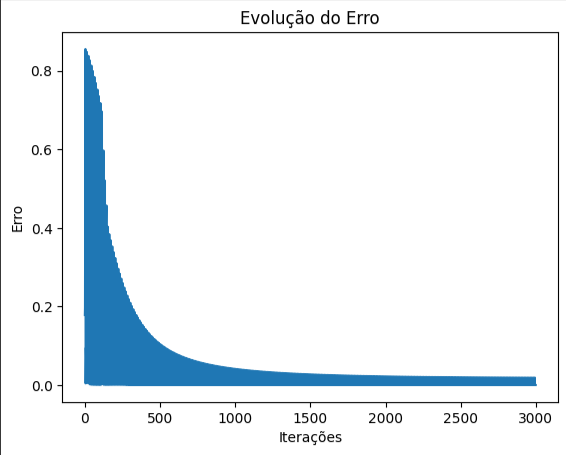

* Valor das saídas após treinamento:

Predições:  
x:  -3.0 | y: 0.73212 | output: 0.7817198846 | erro:  -0.0495998846  
x:  -2.0 | y: 0.73390 | output: 0.7812489095 | erro:  -0.0473489095  
x:  -1.0 | y: 0.78380 | output: 0.7726114902 | erro:   0.0111885098  
x:  -0.5 | y: 0.89030 | output: 0.8680259431 | erro:   0.0222740569  
x:   0.0 | y: 0.98200 | output: 0.9641740729 | erro:   0.0178259271  
x:   0.5 | y: 0.81140 | output: 0.8447646837 | erro:  -0.0333646837  
x:   1.0 | y: 0.59370 | output: 0.6205557092 | erro:  -0.0268557092  
x:   1.5 | y: 0.52190 | output: 0.5217855926 | erro:   0.0001144074  
x:   2.0 | y: 0.50490 | output: 0.4974031846 | erro:   0.0074968154  
x:   3.0 | y: 0.50020 | output: 0.4908760151 | erro:   0.0093239849  

Pesos finais:  
w12: 2.850395259101267  
w13: -3.926036792485418  
w14: -0.3022957045070818  
w23: -0.22055016615310832  
w24: -2.573361113917235  
w35: 3.0801379233951347  
w45: -8.570634029593332  

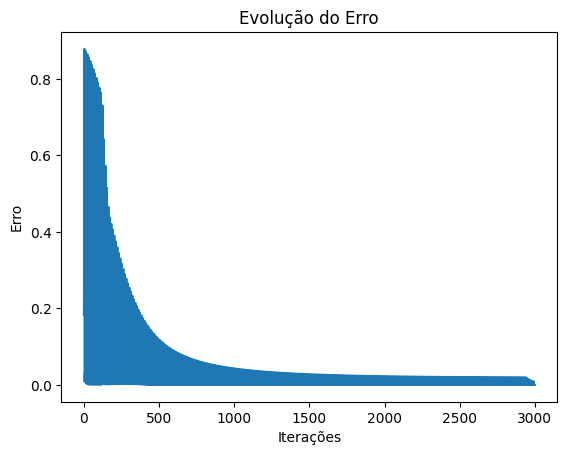

In [749]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# Taxa de Aprendizado da rede
learning_rate = 0.05

# Tendências
bias = [random.random() for _ in range(4)]

# Pesos iniciais
weights = {"w12": 3, "w13": -4, "w14": -1, "w23": 1, "w24": -3, "w35": 2, "w45": -10}

def relu(x):
    if x >= 0:
        return x
    return 0

# Derivada da função ReLU
def d_relu(x):
    if x > 0:
        return 1
    return 0

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Derivada da função Sigmoid
def d_sigmoid(x):
    return x * (1 - x)

# Calcula o erro de cada neurônio
def calculate_error(output, expected):
    a1_error = expected - output
    a2_error = weights["w12"] * a1_error
    a3_error = weights["w13"] * a1_error + weights["w23"] * a2_error
    a4_error = weights["w14"] * a1_error + weights["w24"] * a2_error

    return [a1_error, a2_error, a3_error, a4_error]

# Calcula o valor de saída da rede e também de todos os neurônios
def feed_forward(x):
    a5 = x

    a4 = weights["w45"] * a5 + bias[3]
    a4 = sigmoid(a4)

    a3 = weights["w35"] * a5 + bias[2]
    a3 = sigmoid(a3)

    a2 = weights["w23"] * a3 + weights["w24"] * a4 + bias[1]
    a2 = relu(a2)

    a1 = weights["w12"] * a2 + weights["w13"] * a3 + weights["w14"] * a4 + bias[0]
    a1 = sigmoid(a1)

    return [a1, a2, a3, a4]

plot_error = []

# Gradiente Descendente para treinamento da rede
def gradient_descent(x, y):
    # output[0] é o valor do neurônio de saída a1
    output = feed_forward(x)
    # errors[0] é o erro do neurônio e saída a1
    errors = calculate_error(output[0], y)

    # Calcula os gradientes e ajusta os pesos
    gradient = errors[0] * d_sigmoid(output[0]) * output[1] * learning_rate
    weights["w12"] += gradient

    gradient = errors[0] * d_sigmoid(output[0]) * output[2] * learning_rate
    weights["w13"] += gradient

    gradient = errors[0] * d_sigmoid(output[0]) * output[3] * learning_rate
    weights["w14"] += gradient

    gradient = errors[1] * d_relu(output[1]) * output[2] * learning_rate
    weights["w23"] += gradient

    gradient = errors[1] * d_relu(output[1]) * output[3] * learning_rate
    weights["w24"] += gradient

    gradient = errors[2] * d_sigmoid(output[2]) * x * learning_rate
    weights["w35"] += gradient

    gradient = errors[3] * d_sigmoid(output[3]) * x * learning_rate
    weights["w45"] += gradient

    # Ajusta as tendências
    bias[0] += errors[0] * d_sigmoid(output[0]) * learning_rate
    bias[1] += errors[1] * d_relu(output[1]) * learning_rate
    bias[2] += errors[2] * d_sigmoid(output[2]) * learning_rate
    bias[3] += errors[3] * d_sigmoid(output[3]) * learning_rate

    # Função de custo
    plot_error.append(errors[0]**2)

    return 0

# Amostras para treinamento
# x = entradas, y = saídas esperadas
x = [-3.0, -2.0, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 3.0]
y = [0.73212, 0.7339, 0.7838, 0.8903, 0.9820, 0.8114, 0.5937, 0.5219, 0.5049, 0.5002]

# Execução do treinamento da rede
i = 0
for _ in range(3000):
    gradient_descent(x[i], y[i])
    i += 1
    if i == 10:
        i = 0

# Exibe o gráfico do erro
plt.plot(plot_error)
plt.title("Evolução do Erro")
plt.xlabel("Iterações")
plt.ylabel("Erro")
plt.show()

In [750]:
# Tabela com os valores esperados, valores de saida depois da rede treinada e o erro de cada saída
print("Predições:")
for i in range(len(x)):
    output = feed_forward(x[i])
    print(f"x: {x[i]:5} | y: {y[i]:>5.5f} | output: {output[0]:>5.10f} | erro: {(y[i] - output[0]):>14.10f}")

print("\n")

# Pesos da rede depois de treinada
print("Pesos finais: ")
for i in weights:
    print(f"{i}: {weights[i]}")

Predições:
x:  -3.0 | y: 0.73212 | output: 0.7919883414 | erro:  -0.0598683414
x:  -2.0 | y: 0.73390 | output: 0.7917093422 | erro:  -0.0578093422
x:  -1.0 | y: 0.78380 | output: 0.7841810793 | erro:  -0.0003810793
x:  -0.5 | y: 0.89030 | output: 0.8025334728 | erro:   0.0877665272
x:   0.0 | y: 0.98200 | output: 0.9668401895 | erro:   0.0151598105
x:   0.5 | y: 0.81140 | output: 0.8484903534 | erro:  -0.0370903534
x:   1.0 | y: 0.59370 | output: 0.6175976929 | erro:  -0.0238976929
x:   1.5 | y: 0.52190 | output: 0.5241882648 | erro:  -0.0022882648
x:   2.0 | y: 0.50490 | output: 0.5034928402 | erro:   0.0014071598
x:   3.0 | y: 0.50020 | output: 0.4985778156 | erro:   0.0016221844


Pesos finais: 
w12: 2.8357568327680447
w13: -3.9530181204241748
w14: 0.037457739735368804
w23: -0.1996942686937501
w24: -2.4735049358200376
w35: 3.277861455198686
w45: -8.669176458380463
